In [1]:
import numpy as np

def GetMatrix(links,cities):
    A = np.zeros((len(cities), len(cities)))
    
    for i in range(0, len(links), 3):
        A[cities.index(links[i]), cities.index(links[i + 1])] =  links[i + 2]
           
    return A        

cities = ['Atlanta','Boston', 'Calgary', 'Charleston','Chicago','Dallas', 
          'Denver', 'Duluth', 'ElPaso','Helena', 'Houston', 'KansasCity', 'LasVegas',
          'LittleRock', 'LosAngeles', 'Miami', 'Montreal', 'Nashville',
          'NewOrleans', 'NewYork', 'OklahomaCity', 'Omaha', 'Phoenix',
          'Pittsburgh', 'Portland', 'Raleigh', 'SaintLouis','SaltLakeCity',
          'SanFrancisco','SantaFe', 'SaultStMarie', 'Seattle', 'Toronto',
          'Vancouver', 'Washington', 'Winnipeg']

blue = ['Winnipeg','Helena',4,
        'Portland','SaltLakeCity',6,
        'Omaha','Chicago',4,
        'Montreal','NewYork',3,
        'KansasCity','SaintLouis',2,
        'SantaFe','OklahomaCity',3,
        'Atlanta','Miami',5]

blue = GetMatrix(blue, cities)

white = ['Calgary','Winnipeg',6,
         'Chicago','Toronto',4,
         'SaintLouis','Chicago',2,
         'Pittsburgh','NewYork',2,
         'SanFrancisco','SaltLakeCity',5,
         'Phoenix','Denver',5,
         'LittleRock','Nashville',3]

white = GetMatrix(white, cities)

green = ['Portland','SanFrancisco',5,
         'Helena','Denver',4,
         'SaintLouis','Pittsburgh',5,
         'LittleRock','NewOrleans',3,
         'ElPaso','Houston',6]

green = GetMatrix(green,cities)

red = ['Helena','Omaha',5,
       'Denver','OklahomaCity',4,
       'ElPaso','Dallas',4,
       'NewOrleans','Miami',6,
       'NewYork','Boston',2,
       'Duluth','Chicago',3]

red = GetMatrix(red,cities)

purple = ['Helena','SaltLakeCity',3,
          'Denver','Omaha',4,
          'Duluth','Toronto',6,
          'Charleston','Miami',4,
          'SanFrancisco','LosAngeles',3]
purple = GetMatrix(purple,cities)

orange = ['LasVegas','SaltLakeCity',3,
          'Helena','Duluth',6,
          'Chicago','Pittsburgh',3,
          'Denver','KansasCity',4,
          'NewYork','Washington',2,
          'Atlanta','NewOrleans',4]

orange = GetMatrix(orange,cities);

black = ['LosAngeles','ElPaso',6,
         'Winnipeg','Duluth',4,
         'SaultStMarie','Montreal',5,
         'Nashville','Raleigh',3]

black = GetMatrix(black,cities);

yellow = ['Seattle','Helena',6,
          'ElPaso','OklahomaCity',5,
          'Nashville','Pittsburgh',4]

yellow = GetMatrix(yellow,cities)

gray = ['Vancouver','Seattle',1,
        'Portland','Seattle',1,
        'Vancouver','Calgary',3,
        'Seattle','Calgary',4,
        'Calgary','Helena',4,
        'Winnipeg','SaultStMarie',6,
        'Duluth','SaultStMarie',3,
        'SaultStMarie','Toronto',2,
        'Toronto','Montreal',3,
        'Montreal','Boston',2,
        'Toronto','Pittsburgh',2,
        'LasVegas','LosAngeles',2,
        'LosAngeles','Phoenix',3,
        'Phoenix','ElPaso',3,
        'ElPaso','SantaFe',2,
        'Phoenix','SantaFe',3,
        'SantaFe','Denver',2,
        'Duluth','Omaha',2,
        'Omaha','KansasCity',1,
        'KansasCity','OklahomaCity',2,
        'OklahomaCity','Dallas',2,
        'Dallas','Houston',1,
        'Houston','NewOrleans',2,
        'Dallas','LittleRock',2,
        'OklahomaCity','LittleRock',2,
        'LittleRock','SaintLouis',2,
        'SaintLouis','Nashville',2,
        'Nashville','Atlanta',1,
        'Atlanta','Charleston',2,
        'Charleston','Raleigh',2,
        'Atlanta','Raleigh',2,
        'Raleigh','Washington',2,
        'Raleigh','Pittsburgh',2,
        'Washington','Pittsburgh',2]

gray = GetMatrix(gray,cities)

profit = blue * 1.0 +\
         white * 1.5 +\
         green * 2.0 +\
         red * 2.0 +\
         purple * 2.5 +\
         orange * 1.0 +\
         black * 1.0 +\
         yellow * 2.0 +\
         gray * 1.0

profit_sym = np.dstack([profit, profit.transpose()]).max(axis=2)

costs = np.ones((len(cities), 1)) * 10

Objective value is: 22.0000000023
Houston -> ElPaso
NewOrleans -> Miami
Omaha -> Denver
SaintLouis -> Pittsburgh
SanFrancisco -> Portland
Seattle -> Helena
Toronto -> Duluth


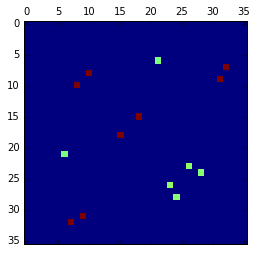

In [125]:
import cvxpy

X = cvxpy.Variable(len(cities), len(cities))
Y = cvxpy.Variable(len(cities))

objective = cvxpy.Maximize(cvxpy.trace(X * profit_sym.T) - Y.T * costs)

constraints = []

for i in range(len(cities)):
    for j in range(len(cities)):
        constraints.append(X[i, j] == X[j, i])
        constraints.append(X[i, j] >= 0)
        constraints.append(X[i, j] <= 1)

    constraints.append(Y[i] >= cvxpy.sum_entries(X[:, i]))
    constraints.append(Y[i] >= 0)
    constraints.append(Y[i] <= 1)

problem = cvxpy.Problem(objective, constraints)
problem.solve()

print('Objective value is: {0}'.format(problem.value))
plt.matshow(X.value)

for in_index, row in enumerate(np.array(X.value)):
    for out_index, indicator in enumerate(row):
        if out_index > in_index:
            break
        
        if indicator > 1e-5:
            print('{0} -> {1}'.format(cities[in_index], cities[out_index]))

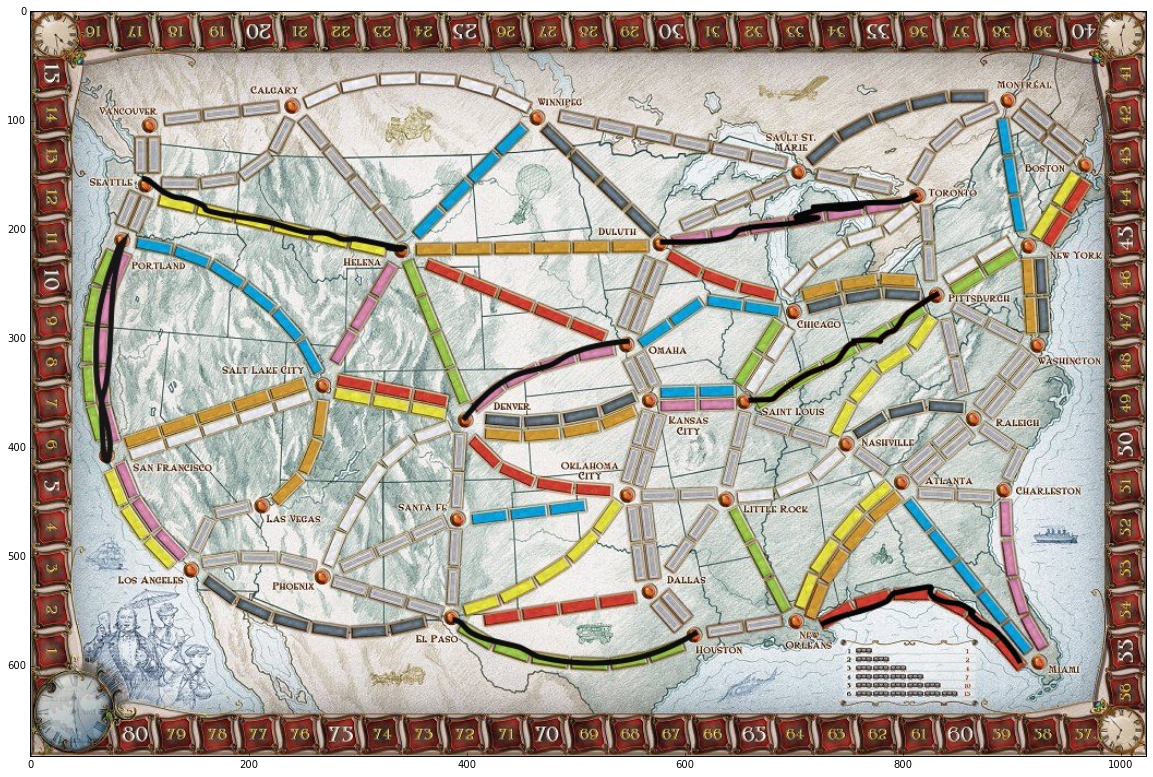

In [115]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
plt.figure(figsize=(20, 20))
plt.imshow(mpimg.imread('map.png'))

It was not a maxflow solution.

In [5]:
profit_sym

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  3.,  0.,  9.],
       ..., 
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  9., ...,  0.,  0.,  0.]])